# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [5]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
df_num_dwellingt_per_year = to_data.groupby(to_data.index).sum()
df_num_dwellingt_per_year = df_num_dwellingt_per_year.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis =1)
df_num_dwellingt_per_year.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [6]:
# Save the dataframe as a csv file
# YOUR CODE HERE!

df_num_dwellingt_per_year.to_csv('number_of_dwelling_type_per_year.csv', header=False)

In [7]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument."""
    fig = plt.figure()
    bar = data.plot.bar(color=color)
    Set_xlabel= xlabel 
    set_ylabel= ylabel
    title= title 
    plt.show()
    plt.close(fig)


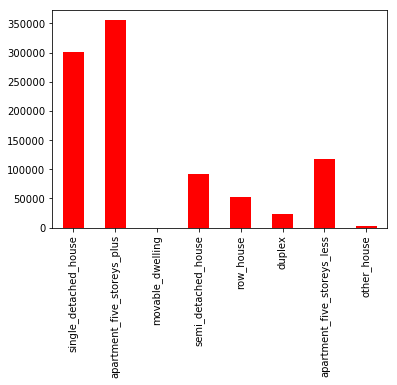

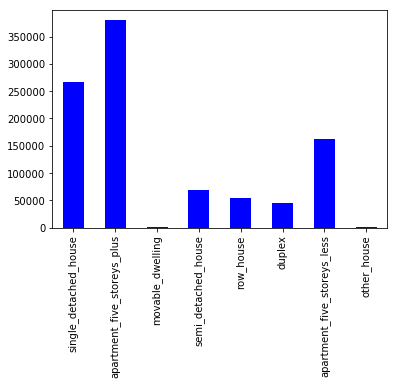

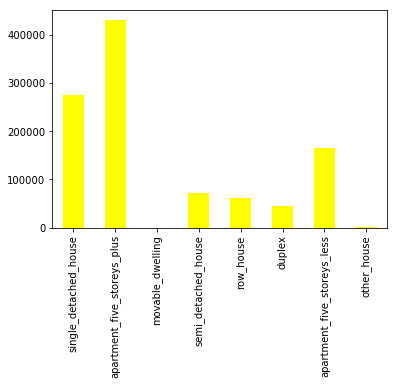

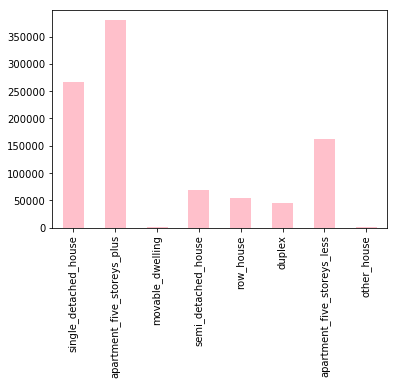

In [8]:



# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2001

create_bar_chart(df_num_dwellingt_per_year.loc[2001], "Dwelling types in 2001", "2001", "Dwelling Types unit","red")


# Bar chart for 2006

create_bar_chart(df_num_dwellingt_per_year.loc[2006], "Dwelling types in 2006", "2006", "Dwelling Types unit","blue")

# Bar chart for 2011
create_bar_chart(df_num_dwellingt_per_year.loc[2011], "Dwelling types in 2011", "2011", "Dwelling Types unit","yellow")

# Bar chart for 2016
#plot_2016.opts(line_color='pink')
create_bar_chart(df_num_dwellingt_per_year.loc[2006], "Dwelling types in 2016", "2016", "Dwelling Types unit","pink")


- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [9]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!
df_monthly_shelter_cost = to_data.groupby(to_data.index).mean()
df_monthly_shelter_cost= df_monthly_shelter_cost.drop(['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house','average_house_value'], axis =1)
df_monthly_shelter_cost.head()    

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [10]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig = plt.figure()
    line = data.plot.line(color= color)
    Set_xlabel= xlabel 
    set_ylabel= ylabel
    title= title 
    plt.show()
    plt.close(fig)


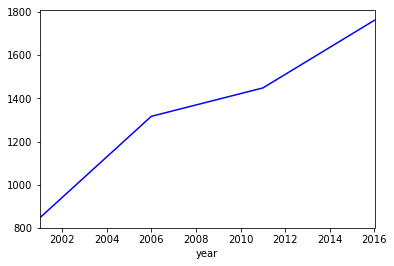

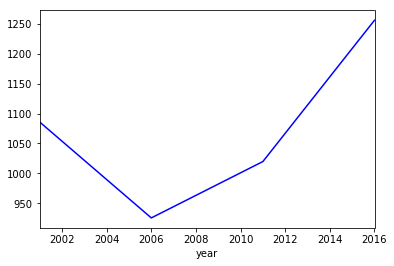

In [11]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(df_monthly_shelter_cost["shelter_costs_owned"], "Dwelling shelter cost onwed", "year", "Dwelling Types unit","blue")

    
# Line chart for rented dwellings
create_line_chart(df_monthly_shelter_cost["shelter_costs_rented"], "Dwelling shelter cost rented", "year", "Dwelling Types unit","blue")


## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [12]:
# Calculate the average house value per year
average_house_value = to_data[["average_house_value"]].groupby("year").mean()
average_house_value.head() 

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


<Figure size 432x288 with 0 Axes>

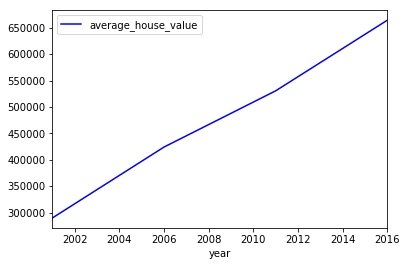

In [13]:
# Plot the average house value per year as a line chart
# YOUR CODE HERE!
create_line_chart(average_house_value, title="average_house_value", xlabel="", ylabel="", color="blue")

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [14]:
# Create a new DataFrame with the mean house values by neighbourhood per year
df_data_frame = to_data
df_data_frame = df_data_frame.drop(['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house','shelter_costs_owned','shelter_costs_rented'], axis =1)   
df_data_frame.head()

,neighbourhood,average_house_value
year,,
2001,Agincourt North,200388
2001,Agincourt South-Malvern West,203047
2001,Alderwood,259998
2001,Annex,453850
2001,Banbury-Don Mills,371864


In [15]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

df_data_frame.hvplot.line("year","average_house_value", groupby = "neighbourhood", xlabel="year",ylabel= "avg house value")

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [16]:
# Fetch the data of all dwelling types per year
# YOUR CODE HERE!
dwellingt_types_per_year = to_data.reset_index()
dwellingt_types_per_year.head(10)

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
5,2001,Bathurst Manor,2405,1550,0,130,130,375,745,0,304749,843,1052
6,2001,Bay Street Corridor,10,7575,0,0,15,0,240,0,257404,1218,1142
7,2001,Bayview Village,2170,630,0,170,765,15,640,0,327644,1197,1164
8,2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5,343535,1212,1018
9,2001,Bedford Park-Nortown,4985,2080,0,45,40,210,1235,15,565304,933,1491


In [17]:
dwellingt_types_per_year = dwellingt_types_per_year.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis =1)

In [18]:
dwellingt_types_per_year.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2,2001,Alderwood,3175,315,0,470,50,185,370,0
3,2001,Annex,1060,6090,5,1980,605,275,3710,165
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0


In [19]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE 
dwellingt_types_per_year.hvplot.bar("year", groupby=["neighbourhood",]
                    , xlabel="year", ylabel="avg. house value", rot=90, height = 500)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [20]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
df_top_exp = to_data.groupby('neighbourhood').sum()
df_top_avg= df_top_exp['average_house_value'].sort_values(ascending=False).nlargest(10)
#df_top_exp = df_top_exp.sort_values('average_house_value', ascending=False).reset_index()
df_top_avg

neighbourhood
Bridle Path-Sunnybrook-York Mills    6105943
Forest Hill South                    4783970
Lawrence Park South                  4376111
Rosedale-Moore Park                  4374560
St.Andrew-Windfields                 3996428
Casa Loma                            3924257
Bedford Park-Nortown                 3721661
Forest Hill North                    3406722
Kingsway South                       3372937
Yonge-St.Clair                       3252881
Name: average_house_value, dtype: int64

In [21]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
df_top_avg.hvplot.bar(rot= 90,height=450,width=450,color="gold").opts(bgcolor="lawngreen")

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [22]:
# Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [23]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
all_neighbourhoods_df = to_data.groupby("neighbourhood").mean().reset_index()
all_neighbourhoods_df.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [24]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!
merged_df= pd.merge(df_neighbourhood_locations,all_neighbourhoods_df)
merged_df.head()

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

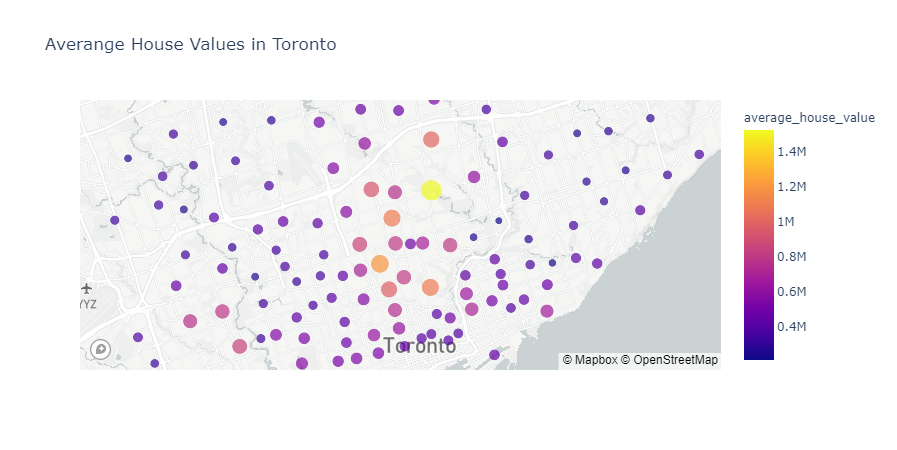

In [26]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!
px.set_mapbox_access_token(map_box_api)
px.set_mapbox_access_token("pk.eyJ1IjoiYW1icmVlbnNpbW9uMjAwMiIsImEiOiJja2dpcGlrdXgwamJ2Mnpuc2Q3c2tqMzd6In0.Ey8qXfQ7cvOasEUdcQiedQ")
map = px.scatter_mapbox(
    merged_df,
    lat="lat",
    lon="lon",
    color="average_house_value",
    size="average_house_value",
    size_max=15,
    zoom=10,
    hover_name="neighbourhood",
    hover_data = [
        "shelter_costs_owned",
        "shelter_costs_rented",
        "single_detached_house",
        "apartment_five_storeys_plus",
        "movable_dwelling",
        "semi_detached_house",
        "row_house",
        "duplex",
        "apartment_five_storeys_less",
        "other_house"
    ],
    title="Averange House Values in Toronto",
    height=450
)
map.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [ ]:
### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

### 